## Setup

In [1]:
%matplotlib inline
from IPython.display import display
import warnings
warnings.simplefilter(action = "ignore")

# External modules
import numpy as np
import os
from pathlib import Path

# Path management
main_dir = str(Path(os.path.abspath('')).parents[0])
os.chdir(main_dir)
print('main dir:',main_dir)

main dir: /Users/pabloguarda/GitHub/isuelogit


In [2]:
# Internal modules
from src import isuelogit as isl

In [3]:
# Common parameters
_BILEVEL_ITERS = 10
_SD_X = 0.1
_SEED = 2022

In [4]:
list_experiments  = ['monotonicity','pseudoconvexity','convergence','biased_reference_od']
run_experiment = dict.fromkeys(list_experiments,True)

## Build networks

In [5]:
small_networks = []

network_generator = isl.factory.NetworkGenerator()

network_names = ['Toy', 'Wang', 'Lo', 'Yang']

# Get dictionaries with adjacency and O-D matrices for a set of custom networks.
As,Qs = network_generator.get_A_Q_custom_networks(network_names)

# Create transportation network using adjacency matrices
for i in network_names:
    small_networks.append(network_generator.build_network(A = As[i], network_name= i))


Creating Toy network

Nodes: 4, Links: 4

Creating Wang network

Nodes: 4, Links: 8

Creating Lo network

Nodes: 6, Links: 14

Creating Yang network

Nodes: 9, Links: 14


## Link performance functions

In [6]:
# Create data generator to generate link attributes
linkdata_generator = isl.factory.LinkDataGenerator()

for small_network in small_networks:
    if small_network.key == 'Yang':
        bpr_parameters_df = linkdata_generator.generate_Yang_bpr_parameters()
    elif small_network.key == 'Lo':
        bpr_parameters_df=linkdata_generator.generate_LoChan_bpr_parameters()
    elif small_network.key == 'Wang':
        bpr_parameters_df=linkdata_generator.generate_Wang_bpr_parameters()
    elif small_network.key == 'Toy':
        bpr_parameters_df = linkdata_generator.generate_toy_bpr_parameters()

    # Set BPR parameters
    small_network.set_bpr_functions(bpr_parameters_df)

## OD matrix

In [7]:
for small_network in small_networks:
    small_network.load_OD(Q  = Qs[small_network.key])

1500.0 trips were loaded among 3 o-d pairs
43886.0 trips were loaded among 12 o-d pairs
4000.0 trips were loaded among 12 o-d pairs
1160.0 trips were loaded among 9 o-d pairs


## Paths

In [8]:
paths_generator = isl.factory.PathsGenerator()

for small_network in small_networks:
    print('\n'+small_network.key, 'network', '\n')
    # With k>=4 shortest paths, all acyclic path of the networks are included in the path sets
    paths_generator.load_k_shortest_paths(network = small_network, k=4)


Toy network 

Generating at most 4 paths per od
6 paths were generated among 3 od pairs in 0.0 [s]

6 paths were loaded in the network

Updating incidence matrices

Matrix D (4, 6) generated in 0.0[s]               

Matrix M (3, 6) generated in 0.0[s]               

Matrix C (6, 6) generated in 0.0[s]               


Wang network 

Generating at most 4 paths per od
24 paths were generated among 12 od pairs in 0.1 [s]

24 paths were loaded in the network

Updating incidence matrices

Matrix D (8, 24) generated in 0.1[s]               

Matrix M (12, 24) generated in 0.0[s]               

Matrix C (24, 24) generated in 0.0[s]               


Lo network 

Generating at most 4 paths per od
44 paths were generated among 12 od pairs in 0.1 [s]

44 paths were loaded in the network

Updating incidence matrices

Matrix D (14, 44) generated in 0.1[s]               

Matrix M (12, 44) generated in 0.0[s]               

Matrix C (44, 44) generated in 0.0[s]               


Yang network 

G

## Descriptive statistics

In [9]:
isl.descriptive_statistics.summary_table_networks(small_networks)

,network,nodes,links,ods,paths
0,Toy,4,4,3,6
1,Wang,4,8,12,24
2,Lo,6,14,12,44
3,Yang,9,14,9,26


In [10]:
for network in small_networks:
    print('\n' + network.key)
    display(network.Z_data)


Toy


,link_type,alpha,beta,tf,k
0,LWRLK,0.15,4.0,1.0,1800.0
1,LWRLK,0.15,4.0,2.0,1800.0
2,LWRLK,0.15,4.0,3.0,1800.0
3,LWRLK,0.15,4.0,4.0,1800.0



Wang


,link_type,alpha,beta,tf,k
0,LWRLK,0.1450,3.5,0.17430,4149.0
1,LWRLK,0.0988,2.7,0.15240,9683.0
2,LWRLK,0.1450,3.5,0.17430,4149.0
3,LWRLK,0.1242,3.5,0.19980,7961.0
4,LWRLK,0.1242,3.5,0.19980,7961.0
5,LWRLK,0.1035,2.7,0.10005,8685.0
6,LWRLK,0.0988,2.7,0.15240,9683.0
7,LWRLK,0.1035,2.7,0.10005,8685.0



Lo


,link_type,alpha,beta,tf,k
0,LWRLK,0.15,4.0,1.52,600.0
1,LWRLK,0.15,4.0,1.52,600.0
2,LWRLK,0.15,4.0,1.52,600.0
3,LWRLK,0.15,4.0,1.52,600.0
4,LWRLK,0.15,4.0,1.52,600.0
5,LWRLK,0.15,4.0,1.52,600.0
6,LWRLK,0.15,4.0,1.52,600.0
7,LWRLK,0.15,4.0,1.52,600.0
8,LWRLK,0.15,4.0,1.52,600.0
9,LWRLK,0.15,4.0,1.52,600.0



Yang


,link_type,alpha,beta,tf,k
0,LWRLK,0.15,4.0,3.00,280.0
1,LWRLK,0.15,4.0,2.25,290.0
2,LWRLK,0.15,4.0,4.50,280.0
3,LWRLK,0.15,4.0,1.50,280.0
4,LWRLK,0.15,4.0,1.50,600.0
5,LWRLK,0.15,4.0,3.00,300.0
6,LWRLK,0.15,4.0,3.00,500.0
7,LWRLK,0.15,4.0,1.50,400.0
8,LWRLK,0.15,4.0,2.25,500.0
9,LWRLK,0.15,4.0,1.50,700.0


## Experiments

### a) Monotonicity of traffic count functions

network: Toy

Generating synthetic link counts via Frank-Wolfe

SUE via fw (max iters: 0)
Ratio of counts versus capacity: 36.1%
Proportion of links over capacity: 0.0%
Normalized RMSE: 0.097


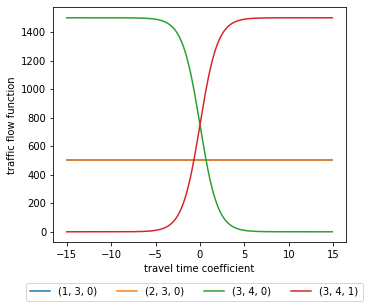

network: Wang

Generating synthetic link counts via Frank-Wolfe

SUE via fw (max iters: 0)
Ratio of counts versus capacity: 130.7%
Proportion of links over capacity: 87.5%
Normalized RMSE: 0.094


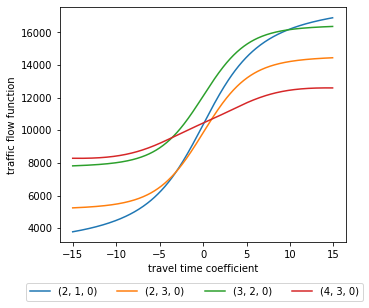

network: Lo

Generating synthetic link counts via Frank-Wolfe

SUE via fw (max iters: 0)
Ratio of counts versus capacity: 106.6%
Proportion of links over capacity: 50.0%
Normalized RMSE: 0.091


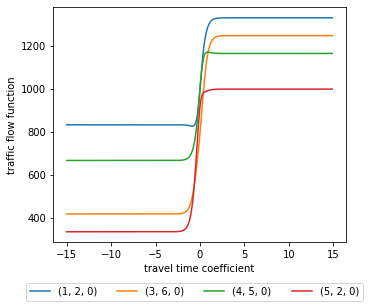

network: Yang

Generating synthetic link counts via Frank-Wolfe

SUE via fw (max iters: 0)
Ratio of counts versus capacity: 51.8%
Proportion of links over capacity: 0.0%
Normalized RMSE: 0.069


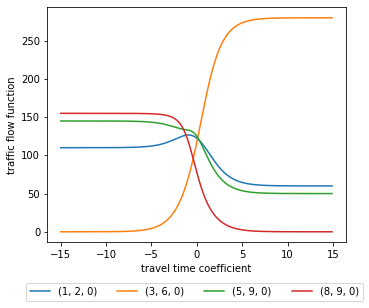

In [11]:
if run_experiment['monotonicity']:

    equilibrator = isl.equilibrium.LUE_Equilibrator(
        max_iters=100,
        method='fw',
        iters_fw=100,
        accuracy=1e-100,
        uncongested_mode = True
    )

    utility_function = isl.estimation.UtilityFunction(features_Y=['tt'], true_values={'tt': -1})

    monotonicity_experiments = isl.experiments.MonotonicityExperiments(
        seed = _SEED,
        name = 'Monotonicity Experiment',
        folderpath=isl.config.dirs['output_folder'] + 'experiments/' + 'small-networks',
        utility_function = utility_function,
        linkdata_generator=isl.factory.LinkDataGenerator(noise_params={'mu_x': 0, 'sd_x': _SD_X}),
        equilibrator = equilibrator,
        networks = small_networks)

    monotonicity_experiments.run(grid=list(np.arange(-15, 15, 0.1)), feature='tt')

### b) Pseudoconvexity of objective function


Pseudo-convexity Experiment
Toy network

Performing grid search for tt



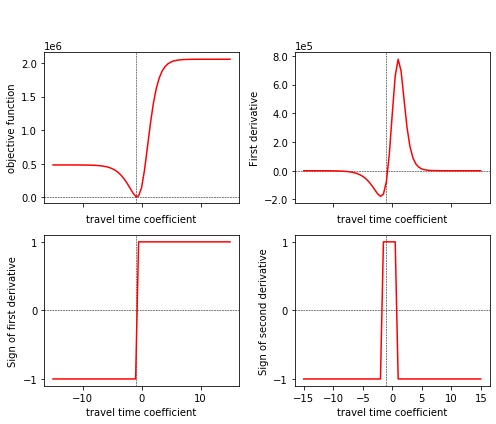

Wang network

Performing grid search for tt



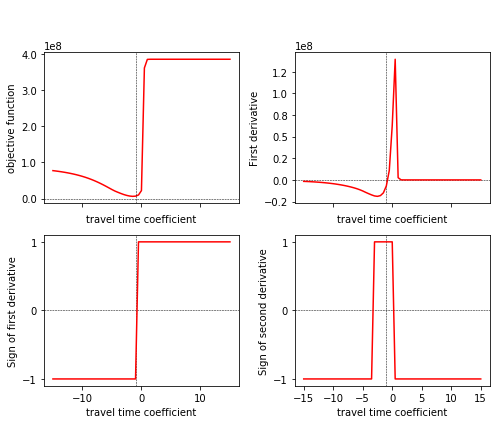

Lo network

Performing grid search for tt



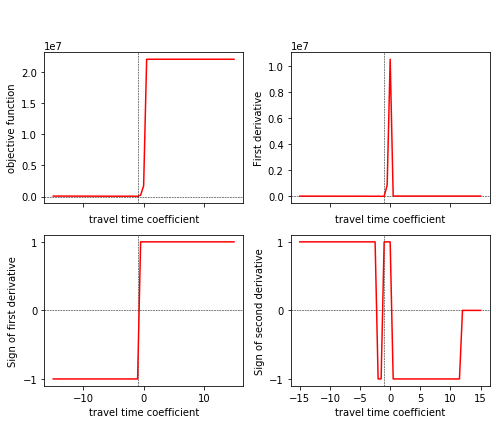

Yang network

Performing grid search for tt



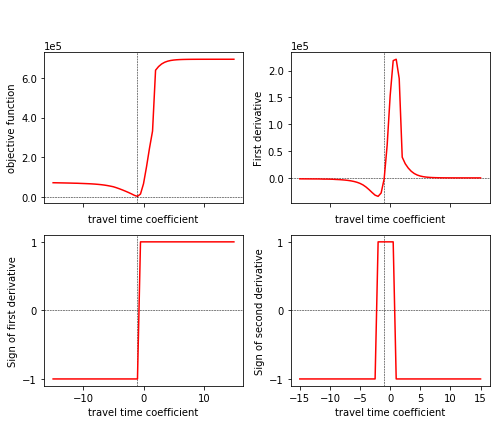

Plot of objective function in the four networks
Plot of sign of first derivative in the four networks


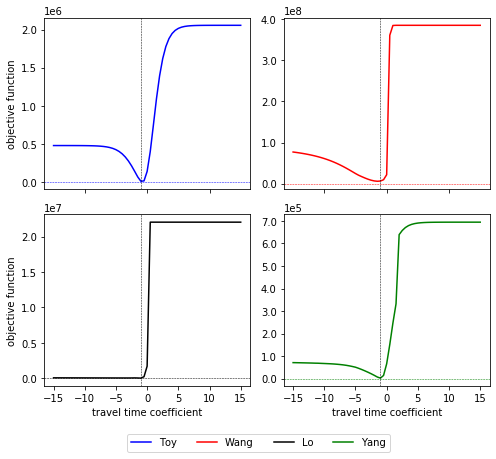

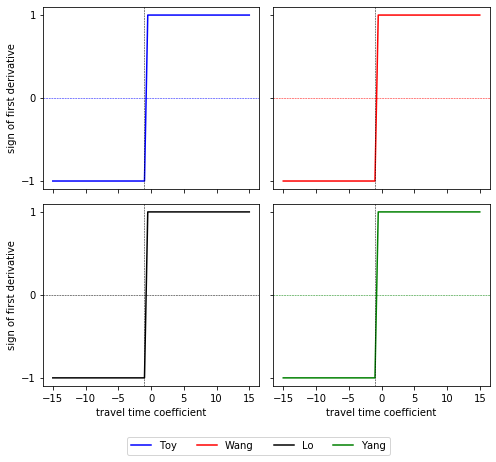

In [12]:
    equilibrator = isl.equilibrium.LUE_Equilibrator(
        max_iters=100,
        method='fw',
        iters_fw=100,
        accuracy=1e-100,
        #uncongested_mode = True,
    )

    utility_function = isl.estimation.UtilityFunction(features_Y=['tt'], true_values={'tt': -1})

    pseudoconvexity_experiments = isl.experiments.PseudoconvexityExperiments(
        seed = _SEED,
        name = 'Pseudo-convexity Experiment',
        folderpath=isl.config.dirs['output_folder'] + 'experiments/' + 'small-networks',
        utility_function = utility_function,
        linkdata_generator = isl.factory.LinkDataGenerator(noise_params={'mu_x': 0, 'sd_x': _SD_X}),
        equilibrator = equilibrator,
        networks = small_networks)

    pseudoconvexity_experiments.run(grid = list(np.arange(-15, 15+0.1, 0.5)), feature = 'tt')

## c) Convergence Experiment


Convergence Experiment

Methods: ['ngd', 'lm']


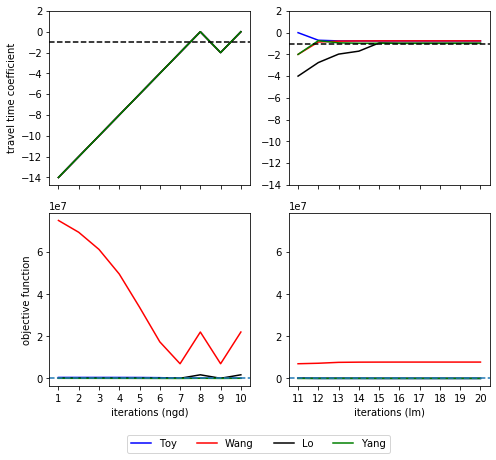


Methods: ['lm', 'ngd']


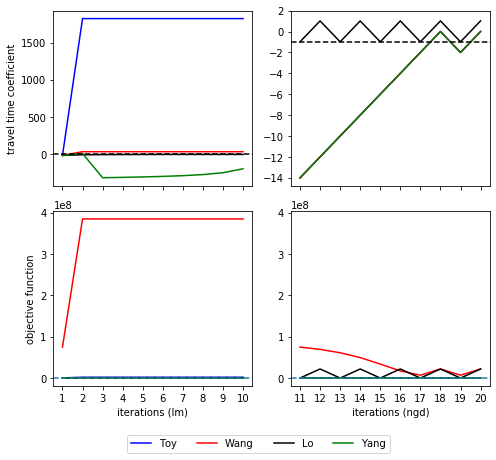

In [13]:
if run_experiment['convergence']:

    equilibrator = isl.equilibrium.LUE_Equilibrator(
        max_iters=100,
        method='fw',
        iters_fw=100,
        accuracy=1e-100,
        #exogenous_traveltimes = True,
        paths_generator=paths_generator
    )

    utility_function = isl.estimation.UtilityFunction(
        features_Y=['tt'],
        initial_values={'tt': -14},
        true_values={'tt': -1}
    )

    outer_optimizer_norefined = isl.estimation.OuterOptimizer(
        method='ngd',
        iters=1,
        eta=2
    )

    outer_optimizer_refined = isl.estimation.OuterOptimizer(
        method='lm',
        #lambda_lm=0,
        iters=1,
    )

    convergence_experiments = isl.experiments.ConvergenceExperiments(
        seed=_SEED,
        name='Convergence Experiment',
        folderpath=isl.config.dirs['output_folder'] + 'experiments/' + 'small-networks',
        outer_optimizers=[outer_optimizer_norefined, outer_optimizer_refined],
        utility_function= utility_function,
        linkdata_generator=isl.factory.LinkDataGenerator(noise_params={'mu_x': 0, 'sd_x':_SD_X}),
        equilibrator=equilibrator,
        bilevel_iters=10,
        networks=small_networks)

    convergence_experiments.run()

## d) Bias in Reference OD matrix


Scenario: true_od

Statistical Inference in No Refined Stage

Bilevel optimization for Yang network 

Initial theta: {'tt': '-1.4E+01'}
Initial objective: 16,877
Initial RMSE: 58.1
Initial Normalized RMSE: 0.24

Estimating parameters via ngd (1 iters, eta = 2.0E+00)


Iterations: |####################| 10/10 
Summary results of bilevel optimization
best iter: 7
best theta: {'tt': '-2.0E+00'}
best objective_value: 3,416
Final best objective improvement: 79.76%
Final best objective improvement value: 13,460.9
Best RMSE: 26.1
Best Normalized RMSE: 0.108
Total time: 2.2 [s]

Hypothesis testing (H0: theta = 0, alpha = 0.05, n = 5)

Hessian approximated as J^T J

 parameter    est               CI  width_CI  t-test  p-value
       tt -2.000 [-3.056, -0.944]     1.056  -5.259    0.006

Computing F-test
    F  critical-F     p  dof_m1  dof_m2    sse_m1   sse_m2  n
9.869       7.709 0.035       0       1 26959.365 7775.389  5
Time: 0.3[s]

Statistical Inference in Refined Stage

Bilevel optimi

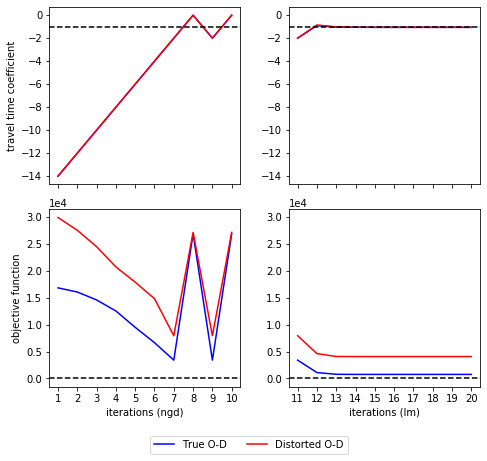

In [14]:
if run_experiment['biased_reference_od']:

    equilibrator = isl.equilibrium.LUE_Equilibrator(
        max_iters=100,
        method='fw',
        iters_fw=100,
        accuracy=1e-100,
        paths_generator=paths_generator
    )

    utility_function = isl.estimation.UtilityFunction(features_Y=['tt'],
                                                      initial_values={'tt': -14},
                                                      true_values={'tt': -1})

    outer_optimizer_norefined = isl.estimation.OuterOptimizer(
        method='ngd',
        iters=1,
        eta=2e0
    )

    outer_optimizer_refined = isl.estimation.OuterOptimizer(
        method='lm',
        # lambda_lm = 0,
        iters=1
    )

    Yang_network = [network for network in small_networks if network.key == 'Yang'][0]

    # As in Yang paper, traffic counts from 5 links are considered for estimation

    bias_reference_od_experiment = isl.experiments.BiasReferenceODExperiment(
        seed=_SEED,
        name='Bias OD Experiment',
        folderpath=isl.config.dirs['output_folder'] + 'experiments/' + 'small-networks',
        outer_optimizers=[outer_optimizer_norefined, outer_optimizer_refined],
        utility_function=utility_function,
        linkdata_generator=isl.factory.LinkDataGenerator(noise_params={'mu_x': 0, 'sd_x': _SD_X}),
        equilibrator= equilibrator,
        bilevel_iters = _BILEVEL_ITERS,
        network= Yang_network)

    bias_reference_od_experiment.run(distorted_Q = network_generator.get_A_Q_custom_networks(['Yang2'])[1]['Yang2'])